# Visualizing FordGoBike Data

## (January 2019 - December 2019)

### Swapnil

### Table of Contents
- [Introduction](#intro)
- [Data Cleaning](#Cleaning)
- [Data Wrangling](#Wrangling)
- [Univariate Exploration](#univariate)
- [Bivariate Explorationn](#bivariate)
- [Multivariate Exploration](#multivariate)
- [Conclusion](#conclusion)

<a id='intro'></a>
## Introduction

> Ford GoBike is the Bay Area's bike share system. Bay Area Bike Share was introduced in 2013 as a pilot program for the region, with 700 bikes and 70 stations across San Francisco and San Jose. Once expansion is complete, Ford GoBike will grow to 7,000 bikes across San Francisco, the East Bay and San Jose.

> Ford GoBike, like other bike share systems, consists of a fleet of specially designed, sturdy and durable bikes that are locked into a network of docking stations throughout the city. The bikes can be unlocked from one station and returned to any other station in the system, making them ideal for one-way trips. People use bike share to commute to work or school, run errands, get to appointments or social engagements and more. It's a fun, convenient and affordable way to get around.

>The bikes are available for use 24 hours/day, 7 days/week, 365 days/year and riders have access to all bikes in the network when they become a member or purchase a pass.

> See the data [here](https://www.fordgobike.com/system-data)

<a id='Wrangling'></a>
## Data Wrangling

In [35]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from jupyterthemes import jtplot
jtplot.style(theme='onedork')
import os
import datetime

no_color = sb.color_palette()[0]

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [8]:
path="D:\\Learning\\Udacity\\Data Analyst Nanodegree\\Project_5_Communicate Data Findings\\Data Files\\"
files=[file for file in os.listdir(path)]
Bike_data=pd.DataFrame()
for file in files:
    df=pd.read_csv(path+file)
    Bike_data=pd.concat([Bike_data,df])
    
Bike_data.to_csv("D:\\Learning\\Udacity\\Data Analyst Nanodegree\\Project_5_Communicate Data Findings\\Data Files\\Bike_data.csv",index=False)

In [9]:
Bike_data=pd.read_csv('D:\\Learning\\Udacity\\Data Analyst Nanodegree\\Project_5_Communicate Data Findings\\Data Files\\Bike_data.csv')
Bike_data.head()

,bike_id,bike_share_for_all_trip,duration_sec,end_station_id,end_station_latitude,end_station_longitude,end_station_name,end_time,rental_access_method,start_station_id,start_station_latitude,start_station_longitude,start_station_name,start_time,user_type
0,4861,No,80825,196.0,37.808894,-122.256460,Grand Ave at Perkins St,2019-02-01 16:24:49.8640,NaN,229.0,37.775745,-122.213037,Foothill Blvd at 42nd Ave,2019-01-31 17:57:44.6130,Subscriber
1,5506,No,65900,134.0,37.752428,-122.420628,Valencia St at 24th St,2019-02-01 15:16:54.1730,NaN,4.0,37.785881,-122.408915,Cyril Magnin St at Ellis St,2019-01-31 20:58:33.8860,Subscriber
2,2717,No,62633,157.0,37.846784,-122.291376,65th St at Hollis St,2019-02-01 11:30:46.5300,NaN,245.0,37.870139,-122.268422,Downtown Berkeley BART,2019-01-31 18:06:52.9240,Customer
3,4557,No,44680,53.0,37.775946,-122.437777,Grove St at Divisadero,2019-02-01 08:10:50.3180,NaN,85.0,37.770083,-122.429156,Church St at Duboce Ave,2019-01-31 19:46:09.7190,Customer
4,2100,No,60709,28.0,37.787168,-122.388098,The Embarcadero at Bryant St,2019-02-01 07:10:51.0650,NaN,16.0,37.794130,-122.394430,Steuart St at Market St,2019-01-31 14:19:01.5410,Customer


In [10]:
Bike_data.shape

(5013966, 15)

In [12]:
# Let's take a peak into the data's basic information
Bike_data.info(null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5013966 entries, 0 to 5013965
Data columns (total 15 columns):
bike_id                    5013966 non-null int64
bike_share_for_all_trip    4527448 non-null object
duration_sec               5013966 non-null int64
end_station_id             4848162 non-null float64
end_station_latitude       5013966 non-null float64
end_station_longitude      5013966 non-null float64
end_station_name           4849266 non-null object
end_time                   5013966 non-null object
rental_access_method       241676 non-null object
start_station_id           4852498 non-null float64
start_station_latitude     5013966 non-null float64
start_station_longitude    5013966 non-null float64
start_station_name         4853700 non-null object
start_time                 5013966 non-null object
user_type                  5013966 non-null object
dtypes: float64(6), int64(2), object(7)
memory usage: 573.8+ MB


In [13]:
# Let's also get some additional description for stats figures
Bike_data.describe()

,bike_id,duration_sec,end_station_id,end_station_latitude,end_station_longitude,start_station_id,start_station_latitude,start_station_longitude
count,5.013966e+06,5.013966e+06,4.848162e+06,5.013966e+06,5.013966e+06,4.852498e+06,5.013966e+06,5.013966e+06
mean,2.789833e+04,8.076483e+02,1.427044e+02,3.776422e+01,-1.223459e+02,1.465047e+02,3.776506e+01,-1.223499e+02
std,1.146066e+05,1.974714e+03,1.214296e+02,2.392885e-01,7.080417e-01,1.223171e+02,1.363698e-01,3.089648e-01
min,4.000000e+00,6.000000e+01,3.000000e+00,0.000000e+00,-1.225143e+02,3.000000e+00,0.000000e+00,-1.225143e+02
25%,1.952000e+03,3.590000e+02,4.300000e+01,3.777003e+01,-1.224117e+02,4.700000e+01,3.776931e+01,-1.224130e+02
50%,4.420000e+03,5.710000e+02,1.010000e+02,3.778076e+01,-1.223981e+02,1.050000e+02,3.778053e+01,-1.223983e+02
75%,9.682000e+03,8.870000e+02,2.390000e+02,3.779587e+01,-1.222934e+02,2.430000e+02,3.779539e+01,-1.222914e+02
max,9.999410e+05,9.121100e+05,4.980000e+02,4.551000e+01,0.000000e+00,4.980000e+02,4.551000e+01,0.000000e+00


In [14]:
# Any duplicates?
Bike_data.duplicated().sum()

1229191

There are 1229191 duplicate records which can be droped.

In [16]:
Bike_data.drop_duplicates(keep=False,inplace=True) 

In [17]:
Bike_data.duplicated().sum()

0

In [18]:
# NaN values?
Bike_data.isna().sum()

bike_id                          0
bike_share_for_all_trip     214772
duration_sec                     0
end_station_id               55150
end_station_latitude             0
end_station_longitude            0
end_station_name             54768
end_time                         0
rental_access_method       2462734
start_station_id             53826
start_station_latitude           0
start_station_longitude          0
start_station_name           53370
start_time                       0
user_type                        0
dtype: int64

 It looks like some of the start,end station details missing along with bike_share_for_all_trip and rental_access_method. 

<a id='Cleaning'></a>
## Data Cleaning

After Data Wrangling we able to indentify below observation which we need to clean:
- There are missing values throughout the dataset (start,end station details, bike_share_for_all_trip and rental_access_method)
- Start/end times are not in the timestamp format
- The following columns are not in object format: 
  - start_station_id
  - end_station_id
  - bike_id
- Some columns like rental_access_method can be dropped.

In [19]:
# Save the original data set and save as a new, cleaned version while I clean things up
Bike_data_cleaned = Bike_data.copy()

##### Column Datatype Conversion
- Starting and ending times to the timestamp format
- User type and bike share for all to category format
- Bike ID, start station ID, and end station ID to object format

In [21]:
# Changing the format to datetime
Bike_data_cleaned.start_time = pd.to_datetime(Bike_data_cleaned.start_time)
Bike_data_cleaned.end_time = pd.to_datetime(Bike_data_cleaned.end_time)

In [22]:
# Changing the user_type, member_gender, and bike_share_for_all_trip to category format
Bike_data_cleaned.user_type = Bike_data_cleaned.user_type.astype('category')
Bike_data_cleaned.bike_share_for_all_trip = Bike_data_cleaned.bike_share_for_all_trip.astype('category')

In [23]:
# Changing the bike_id, start_station_id, and end_station_id to object
Bike_data_cleaned.bike_id = Bike_data_cleaned.bike_id.astype(str)
Bike_data_cleaned.start_station_id = Bike_data_cleaned.start_station_id.astype(str)
Bike_data_cleaned.end_station_id = Bike_data_cleaned.end_station_id.astype(str)

In [24]:
Bike_data_cleaned.info(null_counts = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2555584 entries, 1 to 5013958
Data columns (total 15 columns):
bike_id                    2555584 non-null object
bike_share_for_all_trip    2340812 non-null category
duration_sec               2555584 non-null int64
end_station_id             2555584 non-null object
end_station_latitude       2555584 non-null float64
end_station_longitude      2555584 non-null float64
end_station_name           2500816 non-null object
end_time                   2555584 non-null datetime64[ns]
rental_access_method       92850 non-null object
start_station_id           2555584 non-null object
start_station_latitude     2555584 non-null float64
start_station_longitude    2555584 non-null float64
start_station_name         2502214 non-null object
start_time                 2555584 non-null datetime64[ns]
user_type                  2555584 non-null category
dtypes: category(2), datetime64[ns](2), float64(4), int64(1), object(6)
memory usage: 277.8+ MB


Create Columns for month, day of the week,hour and trip duration in minutes

In [25]:
# Start time month (January - December)
Bike_data_cleaned['start_time_month'] = Bike_data_cleaned['start_time'].dt.strftime('%B')

In [26]:
# Start time month (1-12)
Bike_data_cleaned['start_time_month_num'] = Bike_data_cleaned['start_time'].dt.month.astype(int)

In [27]:
# Start time weekday
Bike_data_cleaned['start_time_weekday'] = Bike_data_cleaned['start_time'].dt.strftime('%a')

In [28]:
# Start and end time hour
Bike_data_cleaned['start_time_hour'] = Bike_data_cleaned['start_time'].dt.hour
Bike_data_cleaned['end_time_hour'] = Bike_data_cleaned['end_time'].dt.hour

In [29]:
# Duration in seconds to duration in minutes
Bike_data_cleaned['duration_min'] = Bike_data_cleaned['duration_sec']/60
Bike_data_cleaned['duration_min'] = Bike_data_cleaned['duration_min'].astype(int)

In [30]:
Bike_data_cleaned.head()

,bike_id,bike_share_for_all_trip,duration_sec,end_station_id,end_station_latitude,end_station_longitude,end_station_name,end_time,rental_access_method,start_station_id,...,start_station_longitude,start_station_name,start_time,user_type,start_time_month,start_time_month_num,start_time_weekday,start_time_hour,end_time_hour,duration_min
1,5506,No,65900,134.0,37.752428,-122.420628,Valencia St at 24th St,2019-02-01 15:16:54.173,NaN,4.0,...,-122.408915,Cyril Magnin St at Ellis St,2019-01-31 20:58:33.886,Subscriber,January,1,Thu,20,15,1098
3,4557,No,44680,53.0,37.775946,-122.437777,Grove St at Divisadero,2019-02-01 08:10:50.318,NaN,85.0,...,-122.429156,Church St at Duboce Ave,2019-01-31 19:46:09.719,Customer,January,1,Thu,19,8,744
4,2100,No,60709,28.0,37.787168,-122.388098,The Embarcadero at Bryant St,2019-02-01 07:10:51.065,NaN,16.0,...,-122.394430,Steuart St at Market St,2019-01-31 14:19:01.541,Customer,January,1,Thu,14,7,1011
6,5114,No,1188,146.0,37.742314,-122.423181,30th St at San Jose Ave,2019-02-01 00:14:27.900,NaN,34.0,...,-122.412408,Father Alfred E Boeddeker Park,2019-01-31 23:54:38.901,Subscriber,January,1,Thu,23,0,19
10,3826,No,2316,292.0,37.344882,-121.896965,Empire St at 1st St,2019-02-01 00:04:36.064,NaN,378.0,...,-121.890800,Empire St at 7th St,2019-01-31 23:25:59.866,Subscriber,January,1,Thu,23,0,38


Miles Traveled

In [31]:
import math
from math import radians, sin, cos, acos

def distance(origin, destination):

    lat1, long1 = origin
    lat2, long2 = destination
    radius = 6371
    # this is in kilometers - will convert to US units of miles after

    dlat = math.radians(lat2 - lat1)
    dlong = math.radians(long2 - long1)
    
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) + math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) * math.sin(dlong / 2) * math.sin(dlong / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c

    return d

In [32]:
# Using the calcuated math on our columns for lat and long
Bike_data_cleaned['distance_km'] = Bike_data_cleaned.apply(lambda x: distance((x['start_station_latitude'], x['start_station_longitude']), (x['end_station_latitude'], x['end_station_longitude'])), axis=1)

In [33]:
# Converting the kilometers to miles
Bike_data_cleaned['distance_miles'] = Bike_data_cleaned['distance_km'] * 0.621371

In [34]:
Bike_data_cleaned.head()

,bike_id,bike_share_for_all_trip,duration_sec,end_station_id,end_station_latitude,end_station_longitude,end_station_name,end_time,rental_access_method,start_station_id,...,start_time,user_type,start_time_month,start_time_month_num,start_time_weekday,start_time_hour,end_time_hour,duration_min,distance_km,distance_miles
1,5506,No,65900,134.0,37.752428,-122.420628,Valencia St at 24th St,2019-02-01 15:16:54.173,NaN,4.0,...,2019-01-31 20:58:33.886,Subscriber,January,1,Thu,20,15,1098,3.859628,2.398261
3,4557,No,44680,53.0,37.775946,-122.437777,Grove St at Divisadero,2019-02-01 08:10:50.318,NaN,85.0,...,2019-01-31 19:46:09.719,Customer,January,1,Thu,19,8,744,0.999632,0.621142
4,2100,No,60709,28.0,37.787168,-122.388098,The Embarcadero at Bryant St,2019-02-01 07:10:51.065,NaN,16.0,...,2019-01-31 14:19:01.541,Customer,January,1,Thu,14,7,1011,0.953355,0.592387
6,5114,No,1188,146.0,37.742314,-122.423181,30th St at San Jose Ave,2019-02-01 00:14:27.900,NaN,34.0,...,2019-01-31 23:54:38.901,Subscriber,January,1,Thu,23,0,19,4.729704,2.938901
10,3826,No,2316,292.0,37.344882,-121.896965,Empire St at 1st St,2019-02-01 00:04:36.064,NaN,378.0,...,2019-01-31 23:25:59.866,Subscriber,January,1,Thu,23,0,38,0.631154,0.392181


### What is the structure of your dataset?

* The FordGoBike data is straightforward and intuitive to understand. This data has been collected efficiently, providing a valuable collection of data to work with and draw conclusions from.

* This notebook uses data collected from January 2019 through December 2019. There were approximately 5013966 bike rides in the  Bay area of California, USA documented.

* The column header descriptions are as follows:
- Trip Duration (seconds)
    - Start Time and Date
    - End Time and Date
- Start Station ID
    - Start Station Name
    - Start Station Latitude
    - Start Station Longitude
- End Station ID
    - End Station Name
    - End Station Latitude
    - End Station Longitude
- Bike ID
- User Type (Subscriber or Customer – “Subscriber” = Member or “Customer” = Walk-IN)
    
    
* I added the following columns in my cleaning efforts:

- Start Time Month	
- Start Time Month Number	
- Start Time Day of the Week	
- Start Time Hour
- Distance (km)
- Distance (miles)

### What is/are the main feature(s) of interest in your dataset?

> The main features include data related to the start and end of a ride. This can be used to calculate when bikes are in high or low demand. There is also ample data related to the users of the bike service including their age, gender, and whether they have membership or Walk-in members. These features can be used to make business decisions which day of the week bikes should be most available,how we can attract walk-in member to take membership.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The start and end times, and related time-based information will be utilized heavily. I will use the customer related data, as well as the distance to understand the user-driven data behind each ride.

<a id='univariate'></a>
## Univariate Exploration

> This section addresses behaviour of individual variables.

### Month

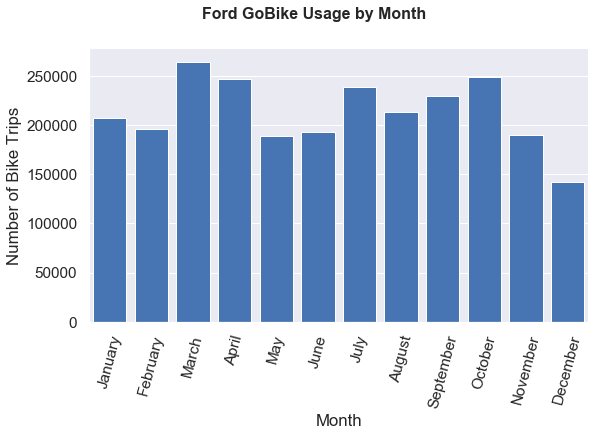

In [58]:
graph = sb.catplot(data = Bike_data_cleaned, x = 'start_time_month', kind = 'count', color = no_color, aspect = 1.7);

graph.set_axis_labels('Month', 'Number of Bike Trips'),

graph.fig.suptitle('Ford GoBike Usage by Month', y = 1.05, fontsize = 16, fontweight = 'bold');

graph.set_xticklabels(rotation=75);


##### Finding 1: March is the most popular month, with October as the second most popular, and April as the third most popular months to use the bike system. The weather in San Francisco is best in the mid-late summer and usually stays sunny until returning to its usual foggy weather in the late autumn/early winter months.  

### Weekday

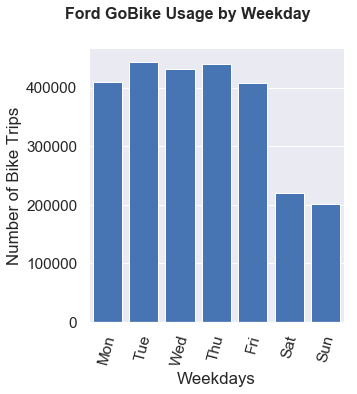

In [59]:
# Weekday usage of the Ford Go bike system
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

ax = sns.catplot(data=Bike_data_cleaned, x='start_time_weekday', kind='count', color = no_color, order = weekday)

ax.set_axis_labels('Weekdays', 'Number of Bike Trips')

ax.fig.suptitle('Ford GoBike Usage by Weekday', y=1.05, fontsize=16, fontweight='bold');

ax.set_xticklabels(rotation=75);

##### Finding 2: Tuesdays and Thursdays seem to be the most popular days for using the bike sharing system.The usage drops significantly on Saturdays and Sundays suggesting the Ford bike share system is used primarily for commuting purposes during working days.

### Hour

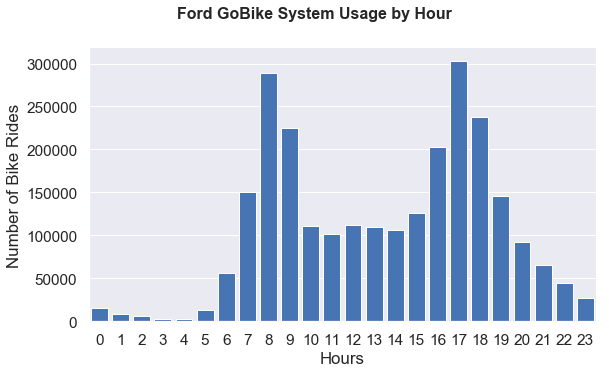

In [60]:
# Hourly usage of the Ford Go Bike System
graph = sb.catplot(data = Bike_data_cleaned, x='start_time_hour', kind='count', color = no_color, aspect = 1.7)

graph.set_axis_labels('Hours', 'Number of Bike Rides')

graph.fig.suptitle('Ford GoBike System Usage by Hour', y=1.05, fontsize=16, fontweight='bold');

##### Finding 3: The bikes saw the most usage during the morning hours of 8-9am, and in the afternoon hours of 6-7pm, which is a typical workday in the United States. This furthers the suggestion that the bikes are being used primarily for commuters. 

### Trip Duration

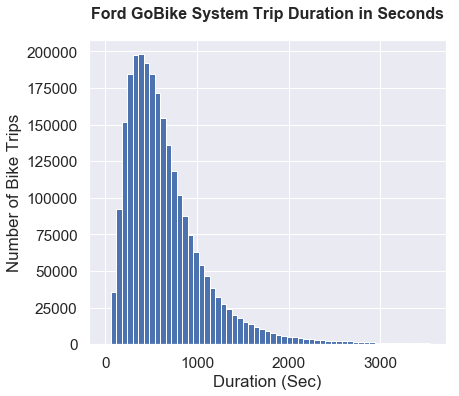

In [63]:
# Duration of the bike rides - in SECONDS
bin_edges = np.arange(0, 3600, 60)

plt.hist(data = Bike_data_cleaned, x = 'duration_sec', bins = bin_edges);

plt.title("Ford GoBike System Trip Duration in Seconds", y=1.05, fontsize=16, fontweight='bold')
plt.xlabel('Duration (Sec)')
plt.ylabel('Number of Bike Trips');

In [65]:
Bike_data_cleaned.duration_min.mean()

11.970185288372443

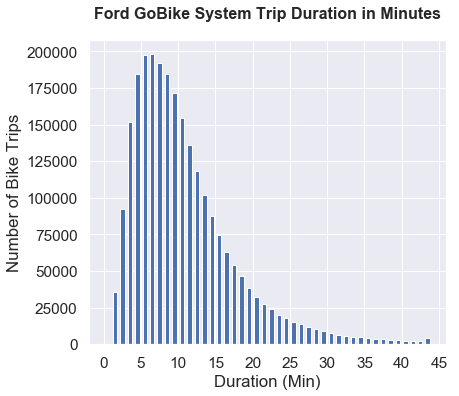

In [64]:
# Duration of the bike rides -in MINUTES
bin_edges = np.arange(0, 45, 1)
ticks = [0, 5, 10, 15, 20, 25, 30,  35, 40, 45]
labels = ['{}'.format(val) for val in ticks]

plt.hist(data = Bike_data_cleaned, x = 'duration_min', bins = bin_edges, rwidth = 0.6);
#sb.distplot(df_cleaned['duration_min'], bins = bin_edges, kde = False, hist_kws = {'alpha' : 1});

plt.title("Ford GoBike System Trip Duration in Minutes", y=1.05, fontsize=16, fontweight='bold')
plt.xlabel('Duration (Min)')
plt.xticks(ticks, labels)
plt.ylabel('Number of Bike Trips');

##### Finding 4: The average trip is just under 12 minutes, with 75% of trips being under 14 minutes. Looking at the histogram, most rides fall in between the 3 - 11 minute range. This suggests riders are taking the bikes short distances. 

### Trip Distance

In [70]:
Bike_data_cleaned.distance_miles.describe()

count    2.555584e+06
mean     1.168225e+00
std      3.065514e+01
min      0.000000e+00
25%      5.830556e-01
50%      9.090487e-01
75%      1.351530e+00
max      7.952316e+03
Name: distance_miles, dtype: float64

In [66]:
Bike_data_cleaned.distance_miles.mean()

1.1682250545454513

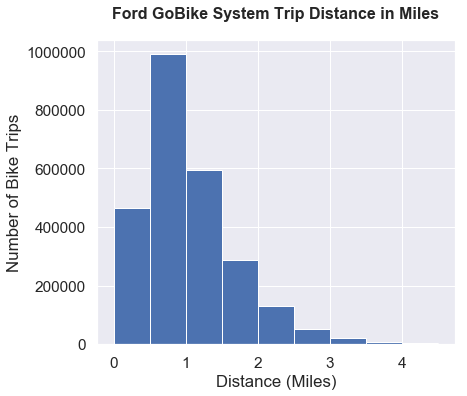

In [69]:
# Distance in miles traveled
bin_edges = np.arange(0, 5, 0.5)

plt.hist(data = Bike_data_cleaned, x = 'distance_miles', bins = bin_edges);

plt.title("Ford GoBike System Trip Distance in Miles", y=1.05, fontsize=16, fontweight='bold')
plt.xlabel('Distance (Miles)')
plt.ylabel('Number of Bike Trips');

##### Finding 5: The mean distance traveled is 1.17 miles, with 75% of rides being 1.35 miles or less. Looking at the histogram above a majority of the rides fall between 0.5-1.5 miles.

# -------------------------------------------------------------------------------------------------------------

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Thankfully, due to thorough cleaning efforts there were no big surprises during the exploratory and visualization phase. The duration of the bike ride and the distance gave me a little trouble since there were some outliers I didn't anticipate.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Nothing seems out of the normal expectations for a bike sharing system in a major city. So far, the data reveals that adults in the average working age range are the primary user base for the system, and they use the bikes on their daily commutes. 

<a id='bivariate'></a>
## Bivariate Exploration

> This section addresses relationships between pairs of variables in the data.

### User Type

In [71]:
# Customers vs Subscribers
customer = Bike_data_cleaned.query('user_type == "Customer"')['bike_id'].count()
subscriber = Bike_data_cleaned.query('user_type == "Subscriber"')['bike_id'].count()
customer_prop = customer / Bike_data_cleaned['bike_id'].count()
subscriber_prop = subscriber / Bike_data_cleaned['bike_id'].count()

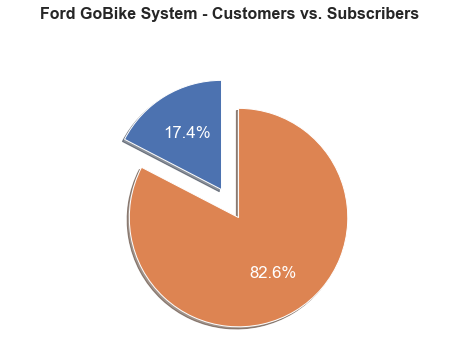

In [80]:
# Customers vs Subscribers Visuals
# pie chart
plt.figure(figsize = [8, 5])

lab = ['Customer', 'Subscriber']
size = [customer_prop, subscriber_prop]
explode = (0, 0.3)

plt.pie(size, explode=explode, labels = lab, autopct='%1.1f%%', shadow=True, startangle=90, textprops={'color':'white'})
plt.axis('equal')

plt.suptitle('Ford GoBike System - Customers vs. Subscribers', y=1.05, fontsize=16, fontweight='bold');

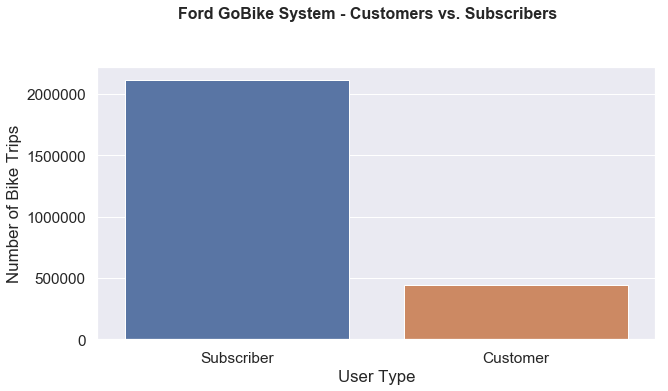

In [78]:
# Customers vs Subscribers Visuals
# bar chart
plt.figure(figsize = [10, 5])

graph = sb.countplot(data = Bike_data_cleaned, x = "user_type", order = Bike_data_cleaned.user_type.value_counts().index);
graph.set_xlabel('User Type');
graph.set_ylabel('Number of Bike Trips');
plt.suptitle('Ford GoBike System - Customers vs. Subscribers', y=1.05, fontsize=16, fontweight='bold');


##### Finding 6: The majority of users for the Ford Go Bike System are Subscribers i.e. customers who subscribe to the monthly membership. Customers pay by trip which is $2 per trip.

### User Type during year

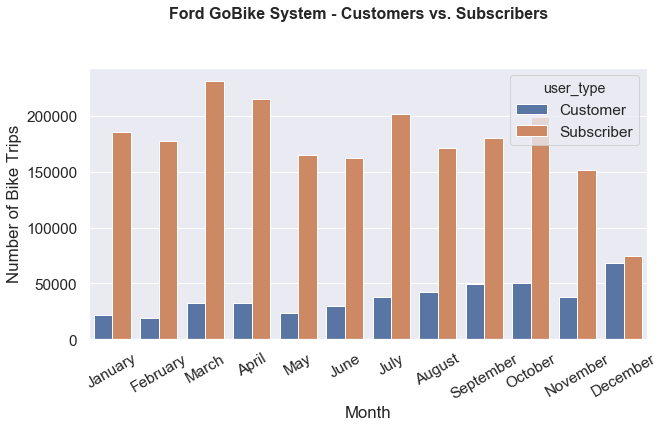

In [88]:
# Customer Usage by Month vs. Subscriber Usage by Month
plt.figure(figsize = [10, 5])
ax=sns.countplot(data=Bike_data_cleaned, x='start_time_month', hue='user_type');
plt.xticks(rotation=30);
plt.xlabel('Month');
plt.ylabel('Number of Bike Trips');
plt.suptitle('Ford GoBike System - Customers vs. Subscribers', y=1.05, fontsize=16, fontweight='bold');

##### Finding 7: Customer and Subcribers showing variation during year as customer high in December whereas Subscribers high in March.

### User Type during week

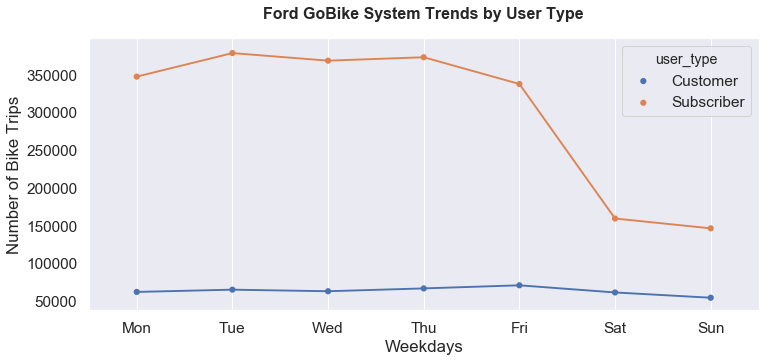

In [92]:
# Customer Usage by Weekday vs. Subscriber Usage by Weekday
plt.figure(figsize=(12, 5))
Bike_data_cleaned_user_week = Bike_data_cleaned.groupby(['start_time_weekday', 'user_type']).size().reset_index()
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

ax = sb.pointplot(data=Bike_data_cleaned_user_week, x='start_time_weekday', y=0, hue = 'user_type', scale=.7, order = weekday);

plt.title('Ford GoBike System Trends by User Type', y=1.05, fontsize=16, fontweight='bold')
plt.xlabel('Weekdays')
plt.ylabel('Number of Bike Trips');
plt.grid()

##### Finding 8: The point plot above is an excellent visual showing the sharp contrast between Customers and Subscribers. Customers have a relatively low usage of the bike share system. Subscribers are the opposite - there is steadily high usage on weekdays, with a sharp decline on the weekend.

### Bike Usage by distance for user type

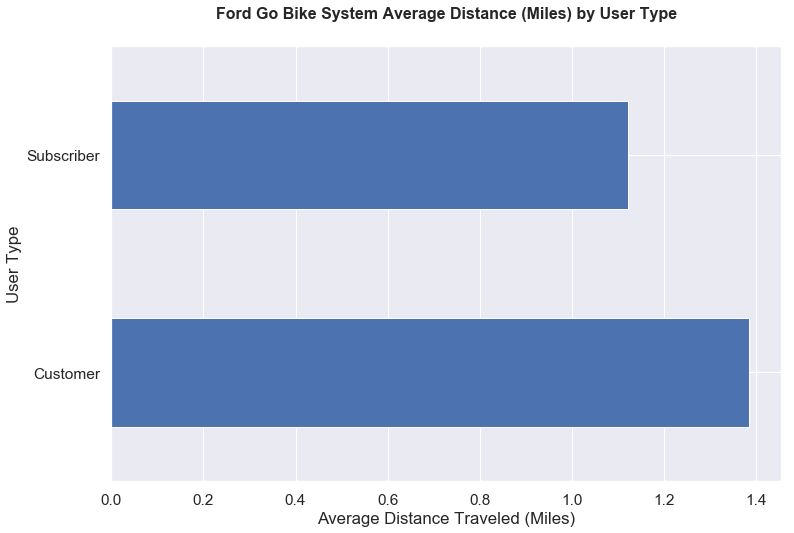

In [94]:
# Customer Usage by Distance vs. Subscriber Usage by Distance
plt = Bike_data_cleaned.groupby('user_type')['distance_miles'].mean().plot(kind='barh', figsize=(12,8));

plt.set_title('Ford Go Bike System Average Distance (Miles) by User Type', y=1.05, fontsize=16, fontweight='bold')
plt.set_xlabel('Average Distance Traveled (Miles)')
plt.set_ylabel('User Type');

##### Finding 9: The average distance traveled by customers is slightly higher than subscribers. Since the data exploration thus far suggests subscribers are using the bike share system for commuting purposes, that suggestion also implies that the commuting distance for the subscribers is less than the average ride a customer takes. 

### Correlation Matrix

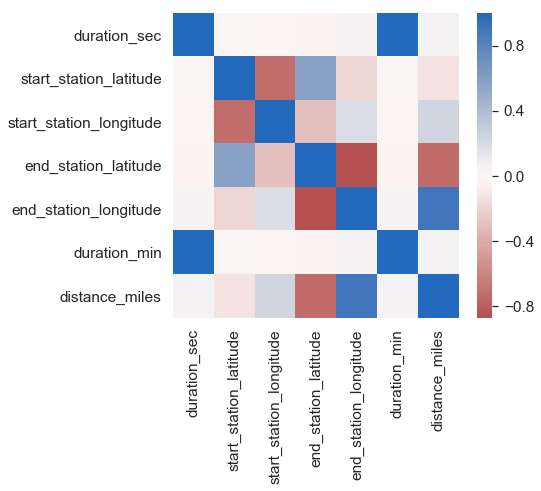

In [112]:
# correlation plot

sns.heatmap(Bike_data_cleaned[all_numeric_vars].corr(), annot = False, fmt = '.3f', cmap = 'vlag_r', center = 0);


#### The correlation cofficients indicate there might be correlations between the following pairs of variables: (start_station_id, end_station_id), (start_station_latitude, start_station_longitude), and (end_station_latitude, end_station_longitude). However, there are no strong evidences to support these. So these might happen just by accident.

## --------------------------------------------------------------------------------------------------------------------------------

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Adding the user type to the analysis revealed different behavior usage between customers and subscribers. The data suggests that customers are casual riders such as tourists, or students on a school vacation or holiday. This is accurate when factoring in that Customer usage increases on the weekends, and peaks during the month of July. In contrast, the data suggests Subscribers are daily commuters or full time students who use the system during weekdays, better weather, and mostly for shorter distances. They mainly rent bikes before and after a typical work or school day (8-9am and 6-7pm).

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> There is a difference in the trip duration between customers and subscribers. Customers trips are usually longer than for subscribers, most probably due to the fact they prefer bike rides around weekends in summertime, which may be for longer trips around the surrounding area. Subscribers use the system mainly for commute purposes so they prefer quick, short rides to and from work.

<a id='multivariate'></a>
## Multivariate Exploration

> This section address grpah of three or more variables to investigate the Ford Go Bike data even further.

TypeError: 'Text' object is not callable

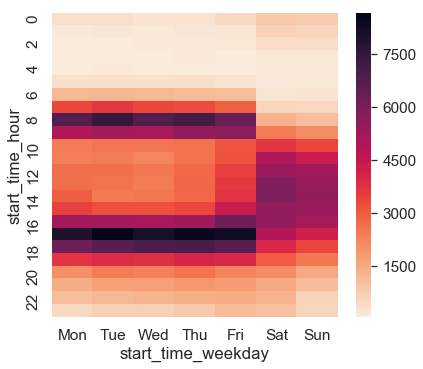

In [120]:
# Weekday order
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
Bike_data_cleaned['start_time_weekday'] = pd.Categorical(Bike_data_cleaned['start_time_weekday'], categories= ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], ordered=True);

#plt.figure(figsize=(15,8))

# Heatmap - Customers
#plt.subplot(1, 2, 1)
Bike_data_customer = Bike_data_cleaned.query('user_type == "Customer"').groupby(['start_time_hour', 'start_time_weekday'])['bike_id'].size().reset_index();
Bike_data_customer = Bike_data_customer.pivot('start_time_hour', 'start_time_weekday', 'bike_id')

heat_map = sb.heatmap(Bike_data_customer, cmap = 'rocket_r')

plt.title('Customer', y=1.05)
plt.xlabel('Weekday', labelpad = 16)
plt.ylabel('Start Time Hour',  labelpad = 16)

plt.show()

#graph.suptitle('Ford GoBike System - Start Time vs. Weekday by User Type', y = 1.05, fontsize = 16, fontweight = 'bold');

TypeError: 'Text' object is not callable

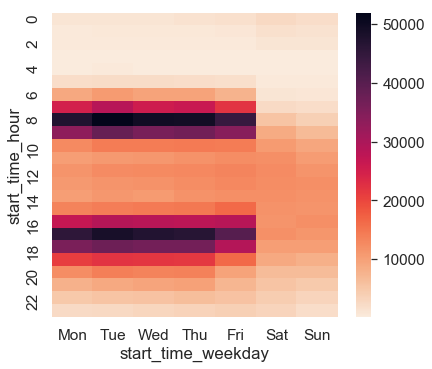

In [121]:
# Heatmap - Subscribers
#plt.subplot(1, 2, 2)
Bike_data_subscriber = Bike_data_cleaned.query('user_type == "Subscriber"').groupby(['start_time_hour', 'start_time_weekday'])['bike_id'].size().reset_index();
Bike_data_subscriber = Bike_data_subscriber.pivot('start_time_hour', 'start_time_weekday', 'bike_id')
hot_map = sb.heatmap(Bike_data_subscriber, cmap = 'rocket_r')

plt.title("Subscriber", y=1.05)
plt.xlabel('Weekday', labelpad = 16)
plt.ylabel('Start Time Hour', labelpad = 16);

plt.show()

##### Finding: Customers use the bike sharing system more often on weekends, whilte Subscribers primarily use the bikes on weekdays. 
##### Customers: During weekdays, most bike rides occur between 4-6pm, peaking on Fridays around 5pm. During weeknds, most bike rides occur between 11am and 6pm, peaking on Saturdays around 2pm.
##### Subscribers: During weekdays, most bike rides occur around 8-9am and 4-6pm. During weekends, there is a significant drop in the number of rented bikes.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> The heatmap didn't reveal anything new for the time based discussion on when and what time each user group uses the bike sharing system. As previously noted, Customers use the system at almost the opposite time as the Subscribers. 

### Were there any interesting or surprising interactions between features?

> Nothing out of the expected here. 

<a id='conclusion'></a>
## Conclusion

This project is a win - win situation where a large number of people can benefit from this program:
- Environmentally friendly, budget friendly, and lifetsyle friendly. 
- Subscribers (i.e. daily commuters) benefit from a health commuting choice
- Customers (i.e. tourists, students, etc.) have a sustainable, yet flexible option for touring the city.
- Affordable and convenient transportation for the people of all socioeconomic classes

Renting a bike from theFord GoBike System is a fantastic (healthy and environmentally friendly) way of moving around in the city, both for enjoyment and work. There are two types of clients using the system: Subscribers and Customers. Subscribers are primarily daily commuters, having short trips to and from work, who rent a bike on weekdays at 8-9am and 6-7pm, and, occasionally around lunch time. Customers are usually tourists or occassional riders who use the system mainly on weekends to explore the Bay Area.